# Generating figure 6 version 3


## notes

something wrong wiht gaaa <br>
CAUGA_UCUAAA num 2 dg = <br>
UACGG_CCUACA num 47 dg = -10.27<br>

different conformation of gaaa <br>
UAUGG_CUUAAC<br> 

there are too low to detect <br>
CACGG_CCUCAC has a mg_1_2 of 331183742950 num 91 dg = -9.19<br>
CAUGC_GCUCAA has a mg_1_2 of 24436593545 num 97 dg = -8.82<br>
CAUGC_GCUGAA has a mg_1_2 of 56272240657.35042 num 98 dg = -8.81 <br>
CAUGG_CCUCAA has a mg_1_2 of 13041211.739924967 num 85 dg = -9.47<br>
CAUGG_CCUGAA has a mg_1_2 of 62.97436351839763 num 84 dg = -9.52<br>
UAAGG_CCUAAAG has a mg_1_2 of 528382.095782343 num 87 dg = -9.41<br>
UAGGG_CCUAAC hs a mg_1_2 of 299747.01552566706 num 83 dg = -9.53<br>


AAUGG_UCUAAG has a mg_1_2 of 31701147 num 99  dg = -8.35<br>
AAUGG_CCUACG has a mg_1_2 of 3701329.2543324344 num 92 dg = -9.16<br>
UAUGG_CCUCAC has a mg_1_2 of 623.0734315542857 num 78 dg = -9.64<br>
ACUGG_CCUGCC has a mg_1_2 of 1500 num 95 dg = -9.06<br>

UACGG_GCUAAG no data?<br>

## setup

In [25]:
# imports
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import sys
from scipy import optimize

from dreem_tools import plotting, parse
from q_dms_ttr_paper.paths import DATA_PATH, LIB_PATH
from q_dms_ttr_paper.titration import normalize_data, normalized_hill_equation, compute_mg_1_2

# general figure tweaks
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["font.size"] = 20
# to fight the theme
plt.rcParams["figure.facecolor"] = "white"

In [26]:
df_wt_mg = pd.read_json(f"{DATA_PATH}/processed/wt_mg_titra.json")
df_wt_buff = pd.read_json(f"{DATA_PATH}/processed/wt_buffer_titra.json")
df_mttr6_muts = pd.read_json(f"{DATA_PATH}/processed/mttr6_muts_titra.json")
df_mttr6_full = pd.read_json(f"{DATA_PATH}/processed/mttr6_data_full.json")
df_mg_1_2 = pd.read_csv(f"{DATA_PATH}/processed/mtt6_data_mg_1_2_final.csv")
df_dg = pd.read_csv(f"{LIB_PATH}/resources/csvs/ttr_mutation_dgs_subset.csv")
df_dg_new = pd.read_csv(f"{LIB_PATH}/resources/csvs/rna_map_dg.csv")

In [27]:
df_mttr6_full = df_mttr6_full[df_mttr6_full["mg_conc"] != 5.0]

### style functions

In [28]:
# style functions
def publication_style_ax(ax):
    for spine in ax.spines.values():
        spine.set_linewidth(2)
    ax.tick_params(width=2)
    fsize = 24
    ax.xaxis.label.set_fontsize(fsize)
    ax.yaxis.label.set_fontsize(fsize)
    ax.tick_params(axis='both', which='major', labelsize=fsize-2)


def publication_scatter(ax, x, y, **kwargs):
    ax.scatter(x, y, s=150, **kwargs)

### plotting functions

In [29]:
def plot_mg_titration_fit(x, y, mg_1_2, n, max_val, ax=None, **kwargs):
    norm_data = -normalize_data(np.array(y)) + 1
    if ax is None:
        fig, ax = plt.subplots(1, 1, **kwargs)
    ax.scatter(x, norm_data, s=100)
    xs, ys = [], []
    for j in np.arange(0, 45, 0.25):
        y = normalized_hill_equation(j, mg_1_2, n, max_val)
        xs.append(j)
        ys.append(y)
    plt.plot(xs, ys, lw=3)
    # plt.fill_between(xs, ys - r[1][0], ys + r[1][0], alpha=0.2, lw=0)
    # plt.ylim(-0.05, 1.1)
    return ax

def r2(x, y):
    return round(stats.pearsonr(x, y)[0] ** 2, 3)

def plot_reg_with_r2(x, y, data):
    fig, ax = plt.subplots()
    sns.regplot(x=x, y=y, data=data, line_kws={"label": r2(data[x], data[y])}, ax=ax)
    plt.legend()
    return ax

## plots

In [30]:
df_wt = df_wt_mg[df_wt_mg["run_name"] == "2022_07_27_minittr_50mM_NaC_Mg_titra_seq"]
df_upper = df_mttr6_full[df_mttr6_full["name"] == "CAUGG_CCUAAA"]
df_lower = df_mttr6_full[df_mttr6_full["name"] == "CACGG_CCCUAAC"]

[0.22869593 1.43065072 0.93748551]
[0.2118959  1.27265055 0.9441983 ]
[3.36827109 1.27441382 0.76793986]


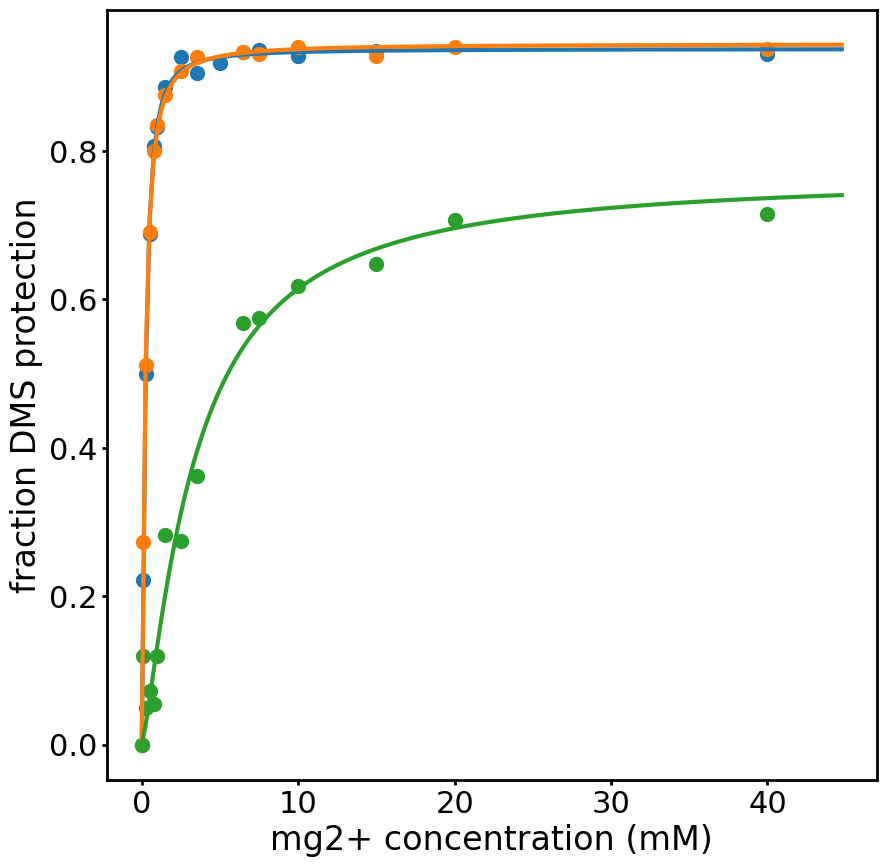

In [31]:
fig, ax = plt.subplots()
pfit, perr = compute_mg_1_2(df_wt["mg_conc"], df_wt["gaaa_avg"])
plot_mg_titration_fit(df_wt["mg_conc"], df_wt["gaaa_avg"], pfit[0], pfit[1], pfit[2], ax=ax)
print(pfit)
pfit, perr = compute_mg_1_2(df_upper["mg_conc"], df_upper["gaaa_avg"])
plot_mg_titration_fit(df_upper["mg_conc"], df_upper["gaaa_avg"], pfit[0], pfit[1], pfit[2], ax=ax)
print(pfit)
pfit, perr = compute_mg_1_2(df_lower["mg_conc"], df_lower["gaaa_avg"])
plot_mg_titration_fit(df_lower["mg_conc"], df_lower["gaaa_avg"], pfit[0], pfit[1], pfit[2], ax=ax)
print(pfit)
publication_style_ax(ax)
ax.set_ylabel("fraction DMS protection")
ax.set_xlabel("mg2+ concentration (mM)")
ax.set_box_aspect(1)

## notes

something wrong wiht gaaa <br>
CAUGA_UCUAAA num 2 dg = <br>
UACGG_CCUACA num 47 dg = -10.27<br>

different conformation of gaaa <br>
UAUGG_CUUAAC<br> 

there are too low to detect <br>
CACGG_CCUCAC has a mg_1_2 of 331183742950 num 91 dg = -9.19<br>
CAUGC_GCUCAA has a mg_1_2 of 24436593545 num 97 dg = -8.82<br>
CAUGC_GCUGAA has a mg_1_2 of 56272240657.35042 num 98 dg = -8.81 <br>
CAUGG_CCUCAA has a mg_1_2 of 13041211.739924967 num 85 dg = -9.47<br>
CAUGG_CCUGAA has a mg_1_2 of 62.97436351839763 num 84 dg = -9.52<br>
UAAGG_CCUAAAG has a mg_1_2 of 528382.095782343 num 87 dg = -9.41<br>
UAGGG_CCUAAC hs a mg_1_2 of 299747.01552566706 num 83 dg = -9.53<br>


AAUGG_UCUAAG has a mg_1_2 of 31701147 num 99  dg = -8.35<br>
AAUGG_CCUACG has a mg_1_2 of 3701329.2543324344 num 92 dg = -9.16<br>
UAUGG_CCUCAC has a mg_1_2 of 623.0734315542857 num 78 dg = -9.64<br>
ACUGG_CCUGCC has a mg_1_2 of 1500 num 95 dg = -9.06<br>

UACGG_GCUAAG no data?<br>

In [65]:
exclude = [
    "CAUGA_UCUAAA",
    "UACGG_CCUACA",
    "UAUGG_CUUAAC",
    "CACGG_CCUCAC",
    "CAUGC_GCUCAA",
    "CAUGC_GCUGAA",
    "CAUGG_CCUCAA",
    "CAUGG_CCUGAA",
    "UAAGG_CCUAAAG",
    "UAGGG_CCUAAC",
    "UAUGG_CCUCAC",
]

df_sub = df_mg_1_2[~df_mg_1_2["name"].isin(exclude)].copy()
df_sub = df_sub.merge(df_dg, on="name")
df_sub = df_sub.merge(df_dg_new, on="name")
df_sub['ln_mg_1_2'] = np.log(df_sub['mg_1_2'])
df_sub['ln_mg_1_2_err'] =  df_sub['mg_1_2_err'] / df_sub['mg_1_2']


In [66]:
df_sub.columns

Index(['name', 'num_points', 'mg_1_2', 'mg_1_2_err', 'n', 'n_err', 'a_0',
       'a_0_err', 'r_name', 'act_seq', 'act_ss', 'seq', 'dg', 'old_dg',
       'rna_map_dg', 'rna_map_dg_err', 'ln_mg_1_2', 'ln_mg_1_2_err'],
      dtype='object')

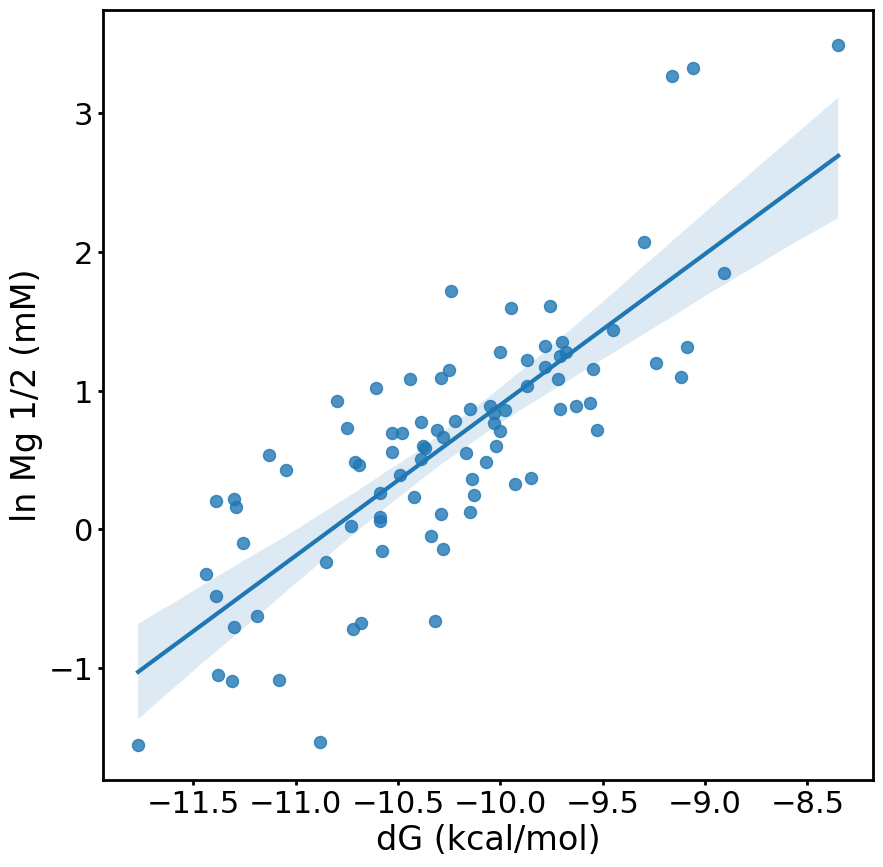

In [69]:
fig, ax = plt.subplots()
sns.regplot(x="dg", y="ln_mg_1_2", data=df_sub, ax=ax, scatter_kws={"s": 75}, line_kws={"lw" : 3})
#plt.errorbar(df_sub["dg"], df_sub["ln_mg_1_2"], xerr=df_sub["rna_map_dg_err"], yerr=df_sub['ln_mg_1_2_err'], fmt="none", capsize=6)
ax.set_box_aspect(1)
ax.set_xlabel("dG (kcal/mol)")
ax.set_ylabel("ln Mg 1/2 (mM)")
publication_style_ax(ax)


In [39]:
r2(df_sub["dg"], df_sub["ln_mg_1_2"])

0.634

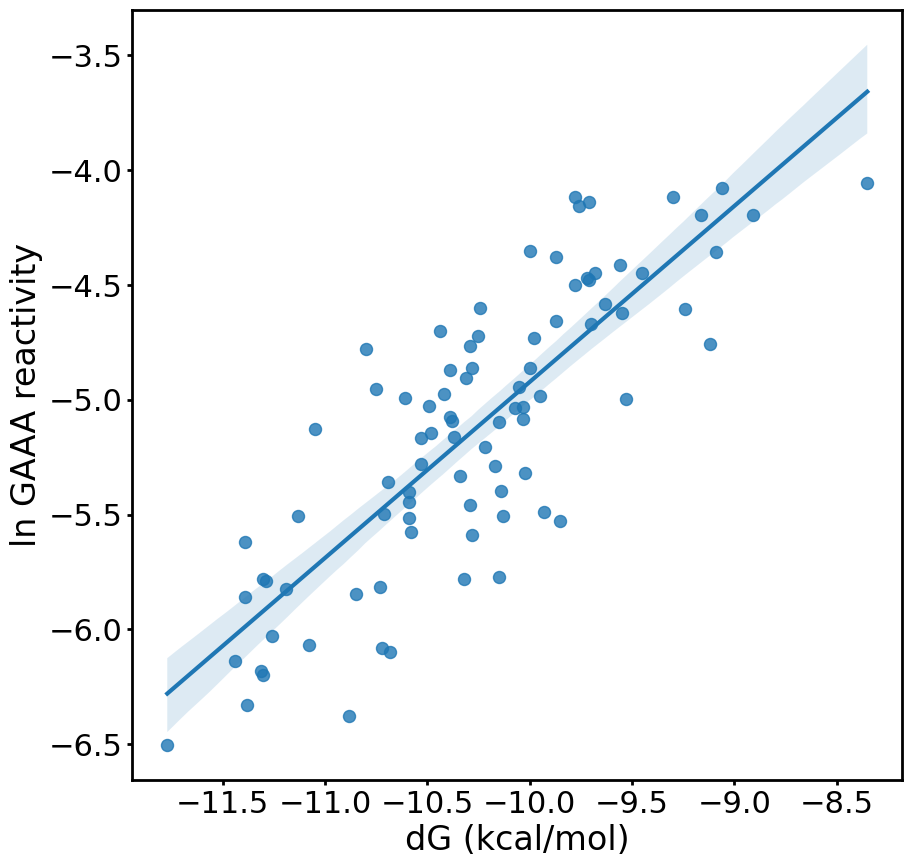

In [70]:
df_sub_mg = df_mttr6_full[df_mttr6_full["mg_conc"] == 10.0]
fig, ax = plt.subplots()
df_sub_mg = df_sub_mg[~df_sub_mg["name"].isin(exclude)]
df_sub_mg.merge(df_dg, on="name")
df_sub_mg = df_sub_mg.merge(df_dg_new, on="name")
df_sub_mg["ln_gaaa_avg"] = np.log(df_sub_mg["gaaa_avg"])
sns.regplot(x="dg", y="ln_gaaa_avg", data=df_sub_mg, ax=ax, scatter_kws={"s": 75}, line_kws={"lw" : 3})
#plt.errorbar(df_sub_mg["dg"], df_sub_mg["ln_gaaa_avg"], xerr=df_sub_mg["rna_map_dg_err"], fmt="none", capsize=6)
ax.set_box_aspect(1)
ax.set_xlabel("dG (kcal/mol)")
ax.set_ylabel("ln GAAA reactivity")
publication_style_ax(ax)


In [37]:
r2(df_sub_mg["dg"], df_sub_mg["ln_gaaa_avg"])

0.676